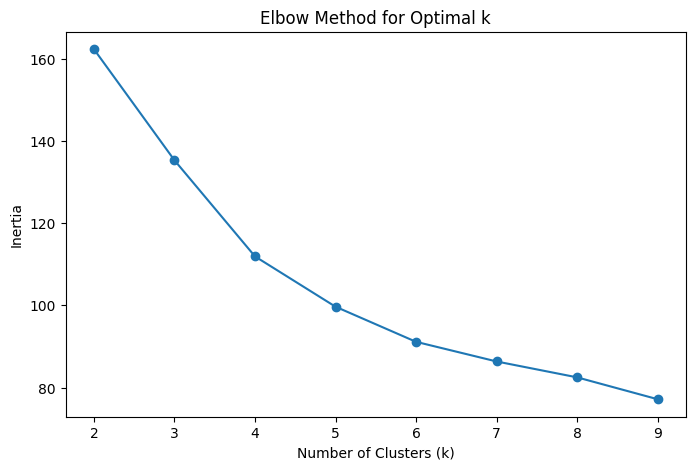

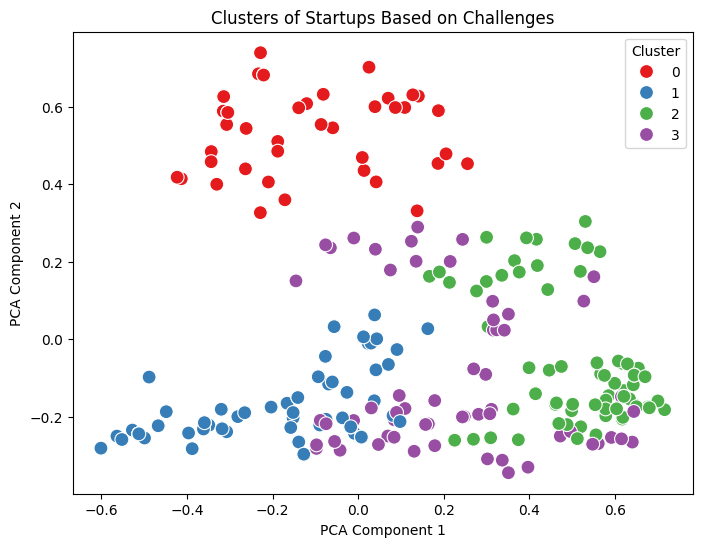

                         Name of your startup  \
0                 sirach technologies pvt ltd   
1                  Iboson Innovations Pvt Ltd   
2                                      SABIT    
3      THINC DIGITAL LEARNING PRIVATE LIMITED   
4                      Cookd Ventures Pvt Ltd   
5              TANGENTUP LABS PRIVATE LIMITED   
6                VIBGYOR GLOBAL WEB SOLUTIONS   
7                             RENOVATEETH LLP   
8           Instigator E-Supporting Services    
9             LIVING THEATRE PRIVATE LIMITED    
10        BLOOMBLOOM DREAMBIZ PRIVATE LIMITED   
11                                    Careayu   
12                 steyin innovations pvt ltd   
13  tinos software and security solutions llp   
14                    santhi wellness pvt ltd   
15                   sketch app solutions llp   
16                           M2H Infotech LLP   
17                       Bourgeon Innovations   
18         Celebrate LEarning Private Limited   
19                  

In [1]:
# Step 1: Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 2: Load the dataset
file_path = "/content/responses.csv"
df = pd.read_csv(file_path)

# Step 3: Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Step 4: Select challenge-related columns
challenge_cols = [
    "What are the top challenges your startup is currently facing ?",
    "What are the key challenges your startup encounters while hiring and retaining skilled talent within Kerala ?",
    "What are the key challenges you face in accessing investors within the Kerala ecosystem?"
]

# Combine all challenge columns into one text field
df["Combined_Challenges"] = df[challenge_cols].fillna("").agg(" ".join, axis=1)

# Step 5: Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_tfidf = vectorizer.fit_transform(df["Combined_Challenges"])

# Step 6: Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 10)  # Trying different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Step 7: Apply K-Means clustering with the best k value (choose from elbow method)
optimal_k = 4  # Change based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_tfidf)

# Step 8: Visualize Clusters using PCA (reducing TF-IDF vectors to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="Set1", s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Startups Based on Challenges")
plt.legend(title="Cluster")
plt.show()

# Step 9: Display Clustered Data
print(df[["Name of your startup", "Combined_Challenges", "Cluster"]].head(20))




🔹 **Cluster 0:**
   - **Top Challenges:** stage, startups, early, hesitant, invest, investors, talent, competition, gap, shortage
   - **Startups:** sirach technologies pvt ltd, tinos software and security solutions llp, Finstron global , Tyler Payment Technologies, Fundfolio Ventures Pvt Ltd, Lipsmac foods llp, Convocomm Softwares, Ez genie solutions pvt ltd, syncrayons technologies pvt ltd, ten point media...
--------------------------------------------------------------------------------
🔹 **Cluster 1:**
   - **Top Challenges:** talent, networks, lack, investor, skill, shortage, gap, hiring, competition, market
   - **Startups:** Iboson Innovations Pvt Ltd, Cookd Ventures Pvt Ltd, Careayu, steyin innovations pvt ltd, santhi wellness pvt ltd, sketch app solutions llp, Bourgeon Innovations, Celebrate LEarning Private Limited, Eduslive private limited, FARM365 INNOVATIONS PRIVATE LIMITED...
--------------------------------------------------------------------------------
🔹 **Cluster 2:*

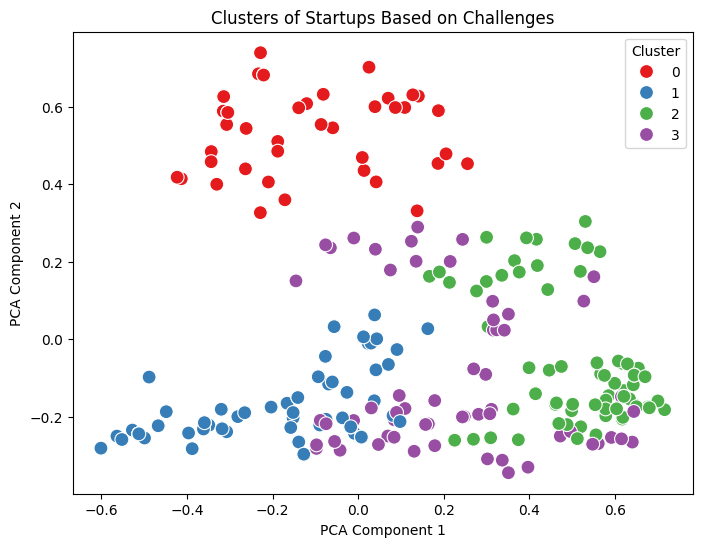

In [2]:
# Step 1: Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter

# Step 2: Load the dataset
file_path = "/content/responses.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Step 3: Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Step 4: Select challenge-related columns
challenge_cols = [
    "What are the top challenges your startup is currently facing ?",
    "What are the key challenges your startup encounters while hiring and retaining skilled talent within Kerala ?",
    "What are the key challenges you face in accessing investors within the Kerala ecosystem?"
]

# Combine all challenge columns into one text field
df["Combined_Challenges"] = df[challenge_cols].fillna("").agg(" ".join, axis=1)

# Step 5: Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X_tfidf = vectorizer.fit_transform(df["Combined_Challenges"])

# Step 6: Apply K-Means clustering with an optimal k value
optimal_k = 4  # Adjust based on Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_tfidf)

# Step 7: Find most frequent words per cluster
def get_top_keywords(X_tfidf, clusters, vectorizer, top_n=10):
    """Finds the most common words in each cluster"""
    feature_names = vectorizer.get_feature_names_out()
    cluster_keywords = {}

    for cluster_num in range(optimal_k):
        cluster_indices = np.where(clusters == cluster_num)[0]
        cluster_texts = X_tfidf[cluster_indices].toarray().sum(axis=0)
        top_words = [feature_names[i] for i in cluster_texts.argsort()[-top_n:][::-1]]
        cluster_keywords[cluster_num] = top_words

    return cluster_keywords

# Get keywords for each cluster
cluster_keywords = get_top_keywords(X_tfidf, df["Cluster"], vectorizer)

# Step 8: Print Cluster Information
for cluster, words in cluster_keywords.items():
    print(f"🔹 **Cluster {cluster}:**")
    print(f"   - **Top Challenges:** {', '.join(words)}")
    startups_in_cluster = df[df["Cluster"] == cluster]["Name of your startup"].tolist()
    print(f"   - **Startups:** {', '.join(startups_in_cluster[:10])}...")  # Show first 10
    print("-" * 80)

# Step 9: Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="Set1", s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Startups Based on Challenges")
plt.legend(title="Cluster")
plt.show()


In [3]:
sector_distribution = df.groupby("Cluster")["In which sector does your startup belongs to ?"].value_counts()
print(sector_distribution)


Cluster  In which sector does your startup belongs to ?
0        Edtech                                            21
         Artificial Intelligence                           15
         IOT                                                8
         IT/ITeS                                            7
         HealthTech                                         5
         Fintech                                            4
         Others                                             4
1        Edtech                                            27
         HealthTech                                        24
         Artificial Intelligence                           22
         Fintech                                           12
         IOT                                               12
         IT/ITeS                                            9
         Others                                             8
2        HealthTech                                        17
         IT/IT

In [4]:
sector_distribution_df = sector_distribution.unstack(fill_value=0)
print(sector_distribution_df)


In which sector does your startup belongs to ?  Artificial Intelligence  \
Cluster                                                                   
0                                                                    15   
1                                                                    22   
2                                                                     8   
3                                                                     6   

In which sector does your startup belongs to ?  Edtech  Fintech  HealthTech  \
Cluster                                                                       
0                                                   21        4           5   
1                                                   27       12          24   
2                                                    8       10          17   
3                                                    7        7          20   

In which sector does your startup belongs to ?  IOT  IT/ITeS  Others  
Clu

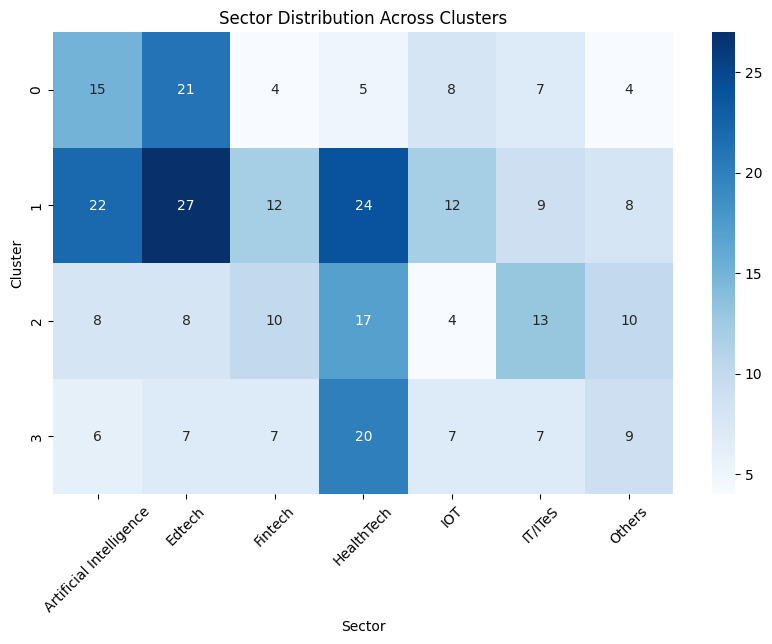

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(sector_distribution_df, cmap="Blues", annot=True, fmt="d")
plt.title("Sector Distribution Across Clusters")
plt.xlabel("Sector")
plt.ylabel("Cluster")
plt.xticks(rotation=45)
plt.show()


In [6]:
most_common_sector = sector_distribution.groupby("Cluster").idxmax()
print(most_common_sector)


Cluster
0        (0, Edtech)
1        (1, Edtech)
2    (2, HealthTech)
3    (3, HealthTech)
Name: count, dtype: object


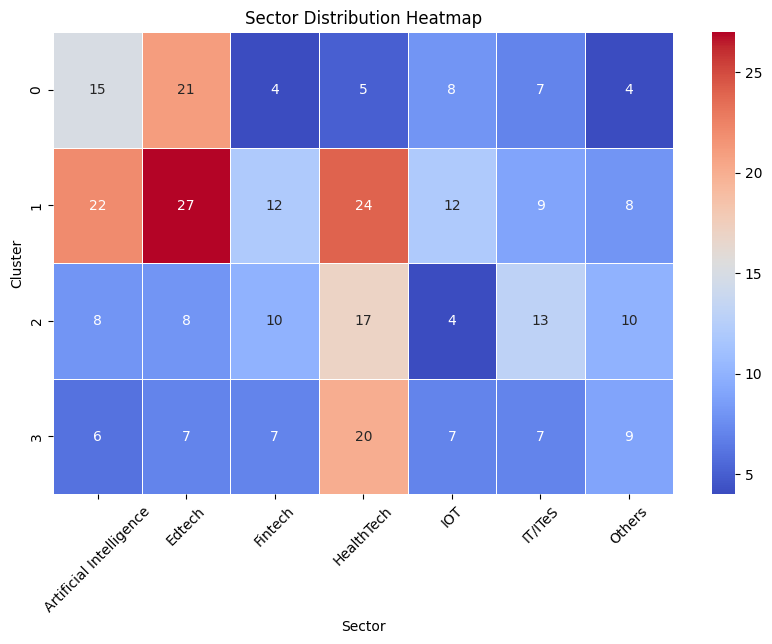

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(sector_distribution_df, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Sector Distribution Heatmap")
plt.xlabel("Sector")
plt.ylabel("Cluster")
plt.xticks(rotation=45)
plt.show()


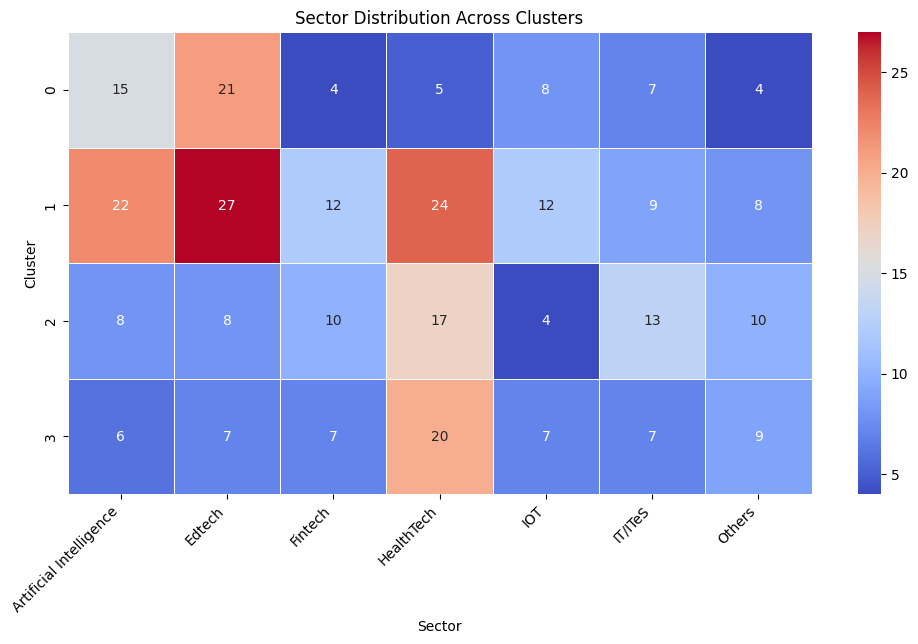

In [15]:
import seaborn as sns

# Group by Cluster and Sector
sector_distribution = df.groupby(["Cluster", "In which sector does your startup belongs to ?"]).size().unstack(fill_value=0)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sector_distribution, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Sector Distribution Across Clusters")
plt.xlabel("Sector")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha="right")
plt.show()


In [20]:
import pandas as pd
import plotly.graph_objects as go

# Ensure challenges are properly split into separate rows
df_exploded = df.assign(Challenges=df["What are the top challenges your startup is currently facing ?"]
                        .str.split(", ")).explode("Challenges")

# Extract unique Clusters and Challenges
clusters = df_exploded["Cluster"].astype(str).unique().tolist()
challenges = df_exploded["Challenges"].dropna().astype(str).unique().tolist()

# Assign numeric indices for source and target
labels = clusters + challenges
source = []
target = []
value = []

# Connect Clusters to Challenges
for cluster in clusters:
    for challenge in challenges:
        count = df_exploded[(df_exploded["Cluster"] == cluster) & (df_exploded["Challenges"] == challenge)].shape[0]
        if count > 1:  # Show only meaningful links
            source.append(labels.index(cluster))
            target.append(labels.index(challenge))
            value.append(count)

# Debugging: Print if any data is missing
print("Clusters:", clusters)
print("Challenges:", challenges)
print("Labels:", labels)
print("Source:", source)
print("Target:", target)
print("Values:", value)

# Define colors for better readability
colors = ["#636EFA"] * len(clusters) + ["#EF553B"] * len(challenges)

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15, thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(171, 171, 171, 0.5)"  # Light grey links for better clarity
    )
))

fig.update_layout(
    title_text="Startup Clusters and Their Challenges",
    font_size=12,
    height=700, width=1000
)

fig.show()


Clusters: ['0', '1', '2', '3']
Challenges: ['Regulatory hurdles', 'Infrastructure issues', 'Hiring talent', 'Market competition', 'Access to funding']
Labels: ['0', '1', '2', '3', 'Regulatory hurdles', 'Infrastructure issues', 'Hiring talent', 'Market competition', 'Access to funding']
Source: []
Target: []
Values: []


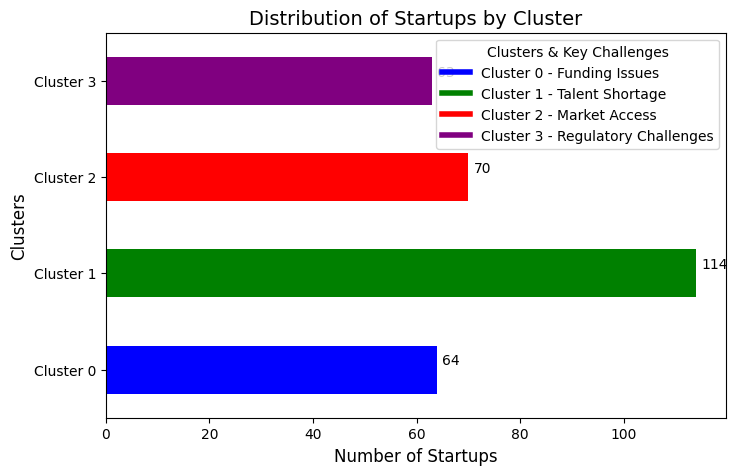

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Cluster' column is integer type for clarity
df["Final_Cluster"] = df["Cluster"].astype(int)

# Count number of startups per cluster
cluster_counts = df["Final_Cluster"].value_counts().sort_index()

# Define colors for each cluster
cluster_colors = {
    0: "blue",   # Cluster 0 - Funding Issues
    1: "green",  # Cluster 1 - Talent Shortage
    2: "red",    # Cluster 2 - Market Access
    3: "purple"  # Cluster 3 - Regulatory Challenges
}

# Plot bar chart for clusters
fig, ax = plt.subplots(figsize=(8, 5))
bars = cluster_counts.plot(kind="barh", color=[cluster_colors[i] for i in cluster_counts.index], ax=ax)

# Labels & Title
plt.title("Distribution of Startups by Cluster", fontsize=14)
plt.xlabel("Number of Startups", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.yticks(range(len(cluster_counts.index)), [f"Cluster {i}" for i in cluster_counts.index])

# Custom Legend
custom_legend = [
    plt.Line2D([0], [0], color="blue", lw=4, label="Cluster 0 - Funding Issues"),
    plt.Line2D([0], [0], color="green", lw=4, label="Cluster 1 - Talent Shortage"),
    plt.Line2D([0], [0], color="red", lw=4, label="Cluster 2 - Market Access"),
    plt.Line2D([0], [0], color="purple", lw=4, label="Cluster 3 - Regulatory Challenges")
]

ax.legend(handles=custom_legend, title="Clusters & Key Challenges", loc="upper right")

# Display bar values on top
for bar in bars.patches:
    plt.text(bar.get_width() + 1, bar.get_y() + 0.3, str(int(bar.get_width())), fontsize=10)

plt.show()


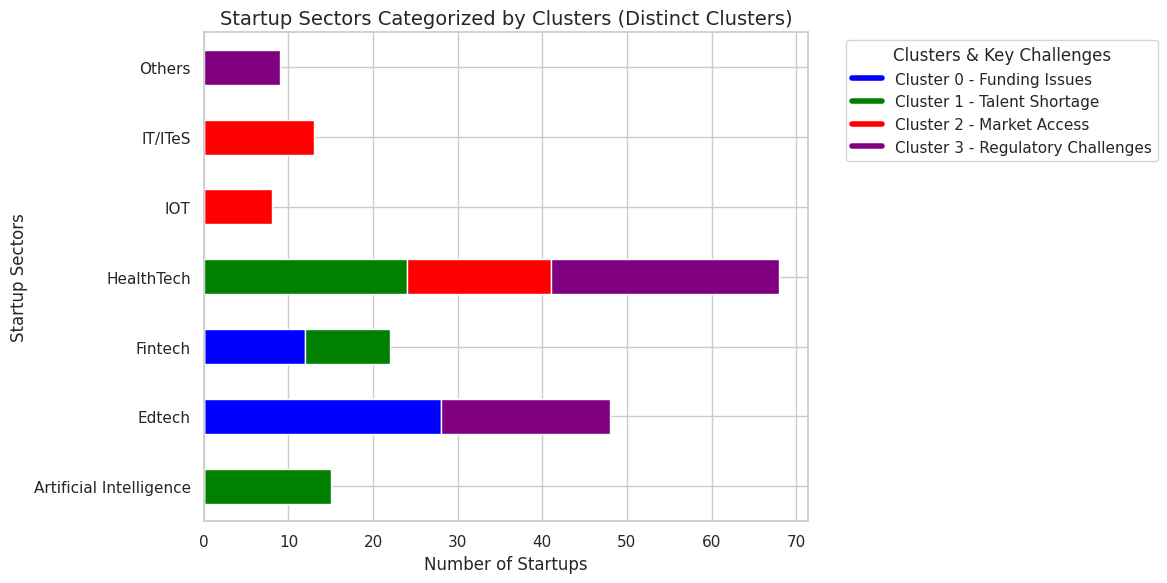

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the cluster column is an integer
df["Final_Cluster"] = df["Cluster"].astype(int)

# Count startups per sector per cluster
sector_distribution = df.groupby(["Final_Cluster", "Sector"])["Count"].sum().unstack().fillna(0)

# Define cluster colors
cluster_colors = {
    0: "blue",    # Cluster 0 - Funding Issues
    1: "green",   # Cluster 1 - Talent Shortage
    2: "red",     # Cluster 2 - Market Access
    3: "purple"   # Cluster 3 - Regulatory Challenges
}

# Assign colors based on clusters
colors = [cluster_colors[i] for i in sector_distribution.index]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sector_distribution.T.plot(kind="barh", stacked=True, color=colors, ax=ax)

# Title and Labels
plt.title("Startup Sectors Categorized by Clusters (Distinct Clusters)", fontsize=14)
plt.xlabel("Number of Startups", fontsize=12)
plt.ylabel("Startup Sectors", fontsize=12)

# Custom Legend Mapping Clusters to Challenges
custom_legend = [
    plt.Line2D([0], [0], color="blue", lw=4, label="Cluster 0 - Funding Issues"),
    plt.Line2D([0], [0], color="green", lw=4, label="Cluster 1 - Talent Shortage"),
    plt.Line2D([0], [0], color="red", lw=4, label="Cluster 2 - Market Access"),
    plt.Line2D([0], [0], color="purple", lw=4, label="Cluster 3 - Regulatory Challenges")
]

# Show legend
ax.legend(handles=custom_legend, title="Clusters & Key Challenges", bbox_to_anchor=(1.05, 1), loc="upper left")

# Improve layout
plt.tight_layout()
plt.show()

